Гопиенко Александр КИ22-17/2Б
Практическая работа №2
Задание 1


In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Создаём две выборки с сильно различающимся средним

In [54]:
sample_1 = np.random.normal(0, 1, size = 1000)
sample_2 = np.random.normal(100, 10, size = 10)

print("Среднее значение первой выборки - ", np.mean(sample_1))
print("Среднее значение второй выборки - ", np.mean(sample_2))
print("Медиана первой выборки - ", np.median(sample_1))
print("Медиана первой выборки - ", np.median(sample_2))

Среднее значение первой выборки -  0.05830018732370326
Среднее значение второй выборки -  99.11189680070912
Медиана первой выборки -  0.07178588799618327
Медиана первой выборки -  96.62296162096783


Объединяем эти выборки, находим медиану и среднее. Строим диаграмму "Ящик с усами".

Среднее значение -  1.039028866664153
Медиана -  0.08655362964394267


<Axes: >

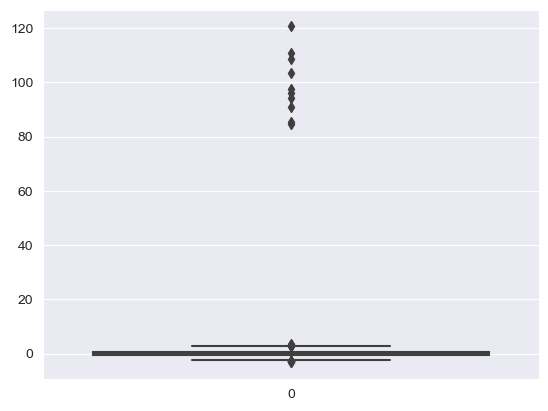

In [55]:
combined_sample = np.concatenate((sample_1, sample_2))

mean = np.mean(combined_sample)
print("Среднее значение - ", mean)

median = np.median(combined_sample)
print("Медиана - ", median)

sns.boxplot(data=combined_sample)

Вывод: Оценка выборки sample_1 наиболее устойчивая к выбросам, так как она больше, чем sample_2

Здание №2

Из нормально распределенной генеральной совокупности сгенерируем
по 1000 раз выборки разного объемом 10, 20, 50 элементов.
 

10 9 1.1111111111111112
Дисперсия для выборки объема 10: 90.97563633350424
Исправленная дисперсия для выборки объема 10: 101.08404037056027
Диаграммы "Ящик с усами" для выборки объема 10


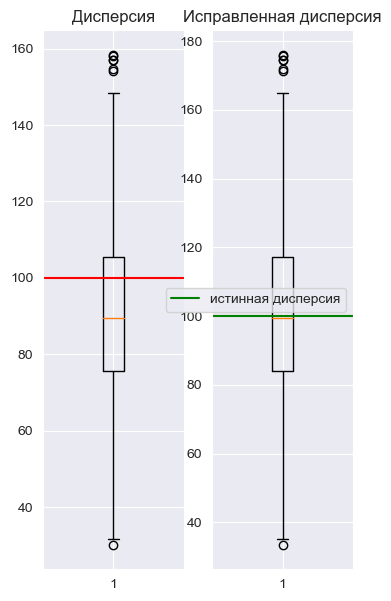

100 99 1.0101010101010102
Дисперсия для выборки объема 100: 99.28496839342618
Исправленная дисперсия для выборки объема 100: 100.28784686204664
Диаграммы "Ящик с усами" для выборки объема 100


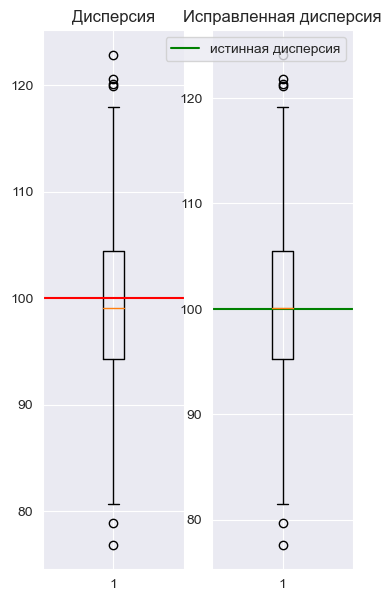

1000 999 1.001001001001001
Дисперсия для выборки объема 1000: 100.05201027147062
Исправленная дисперсия для выборки объема 1000: 100.15216243390454
Диаграммы "Ящик с усами" для выборки объема 1000


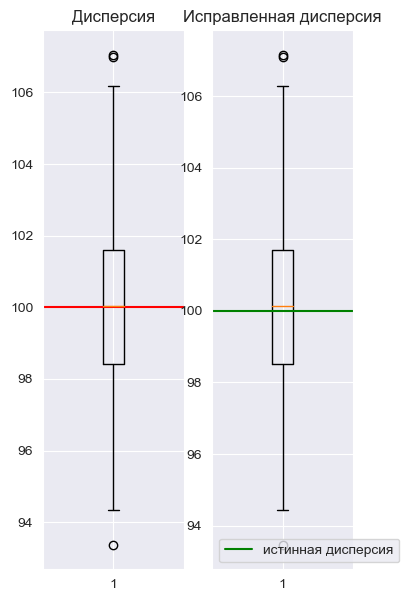

In [56]:
random_n = [10, 100, 1000]
corrected_stds = []
stds = []

standard_mean = 120
standard_std = 100

for j in range(3):
    n = random_n[j]
    std = []
    corrected_std = []

    print(n, n-1, n/(n-1))
    for i in range(1000):
        s = stats.norm(loc=standard_mean, scale=standard_std).rvs(size=n)
        std.append(s.std())
        corrected_std.append(s.std() * n/(n-1))

    corrected_stds.append(corrected_std)
    stds.append(std)
    print(f"Дисперсия для выборки объема {n}: {np.mean(np.array(stds[j]))}")
    print(f"Исправленная дисперсия для выборки объема {n}: {np.mean(np.array(corrected_stds[j]))}")

    print(f"Диаграммы \"Ящик с усами\" для выборки объема {n}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 7))

    axes[0].set_title("Дисперсия")
    axes[0].boxplot(x=std)
    axes[0].axhline(y=standard_std, color="red", label="дисперсия")

    axes[1].set_title("Исправленная дисперсия")
    axes[1].boxplot(x=corrected_std)
    axes[1].axhline(y=standard_std, color="green", label="истинная дисперсия")
    # axes[1].grid()

    plt.legend()
    plt.show()

Вывод: при увеличении объёма выборки уменьшается смещение между исправленной и неисправленной дисперсии

Построим графики плотности распределения
Для среднего значения и заданной дисперсии 

Заданное мат ожидание и дисперсия (120, 100)


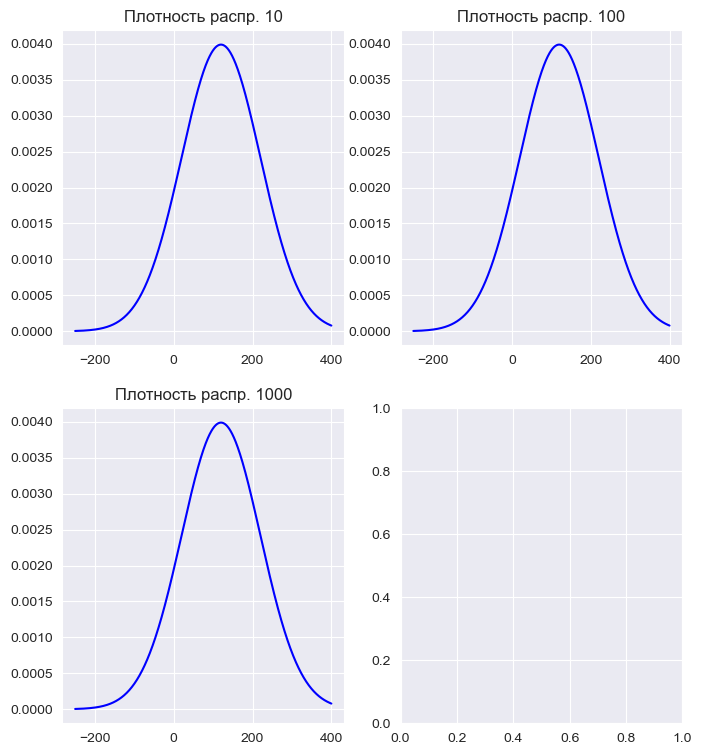

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 9))
print(f"Заданное мат ожидание и дисперсия ({standard_mean}, {standard_std})")
for j in range(3):
    n = random_n[j]
    axes[j//2, j%2].set(title=f"Плотность распр. {n}")
    s = stats.norm(loc=standard_mean, scale=standard_std).rvs(size=n)
    x=np.linspace(-250, 400, 1000)
    y = stats.norm.pdf(x, standard_mean, standard_std)
    axes[j//2, j%2].set_yticks(np.linspace(-0.0005, 0.0045, 11))
    axes[j//2, j%2].plot(x, y, color="blue")

Для среднего значения и выборочной дисперсии 

Объем - 10, заданное мат ожидание и выборочная дисперсия (120, 90.97563633350424)
Объем - 100, заданное мат ожидание и выборочная дисперсия (120, 99.28496839342618)
Объем - 1000, заданное мат ожидание и выборочная дисперсия (120, 100.05201027147062)


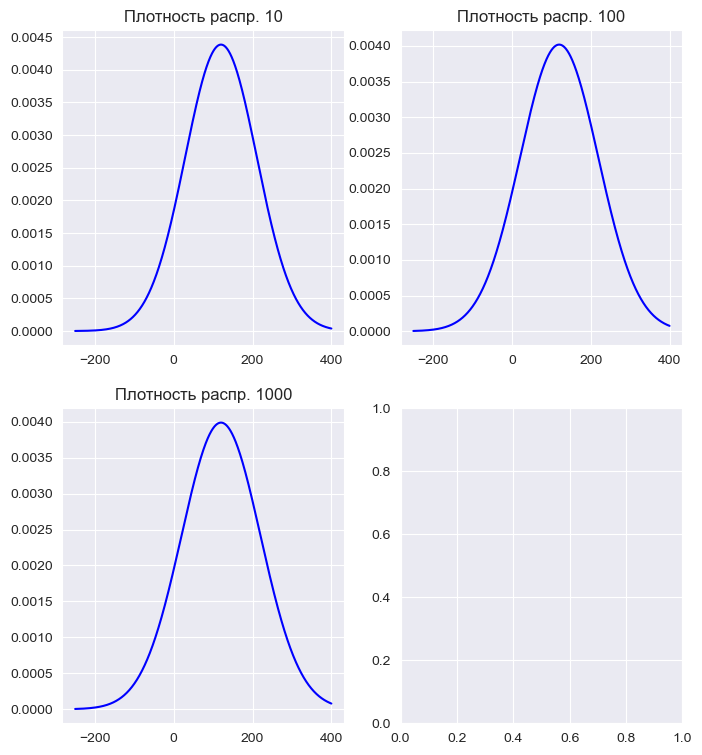

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 9))
for j in range(3):
    n = random_n[j]
    print(f"Объем - {n}, заданное мат ожидание и выборочная дисперсия ({standard_mean}, {np.mean(np.array(stds[j]))})")
    axes[j//2, j%2].set(title=f"Плотность распр. {n}")
    s = stats.norm(loc=standard_mean, scale=np.mean(np.array(stds[j]))).rvs(size=n)
    x=np.linspace(-250, 400, 1000)
    y = stats.norm.pdf(x, standard_mean, np.mean(np.array(stds[j])))
    axes[j//2, j%2].set_yticks(np.linspace(-0.0005, 0.0045, 11))
    axes[j//2, j%2].plot(x, y, color="blue")

Для среднего значения и исправленной выборочной дисперсии 

Объем - 10, заданное мат ожидание и исправленная выборочная дисперсия (120, 101.08404037056027)
Объем - 100, заданное мат ожидание и исправленная выборочная дисперсия (120, 100.28784686204664)
Объем - 1000, заданное мат ожидание и исправленная выборочная дисперсия (120, 100.15216243390454)


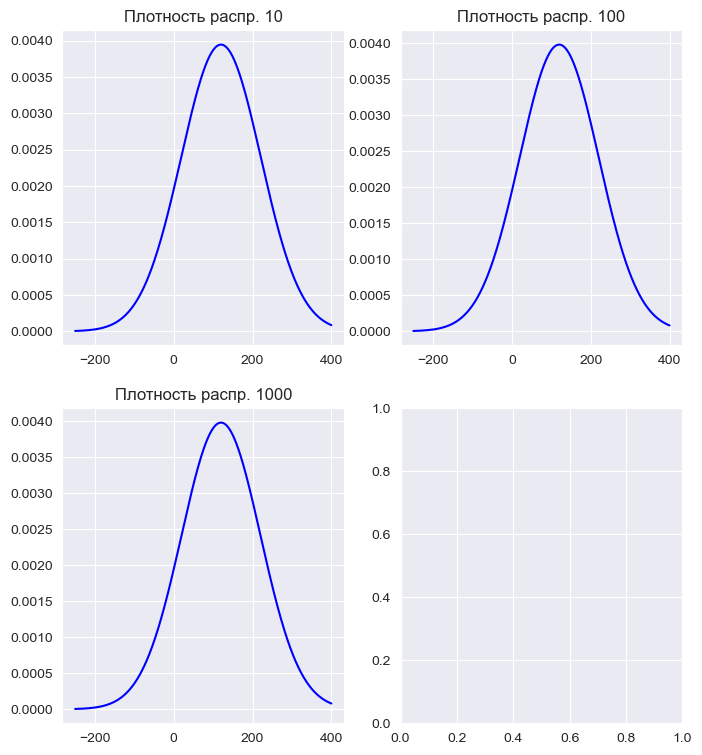

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 9))
for j in range(3):
    n = random_n[j]
    print(f"Объем - {n}, заданное мат ожидание и исправленная выборочная дисперсия ({standard_mean}, {np.mean(np.array(corrected_stds[j]))})")
    axes[j//2, j%2].set(title=f"Плотность распр. {n}")
    s = stats.norm(loc=standard_mean, scale=np.mean(np.array(corrected_stds[j]))).rvs(size=n)
    x=np.linspace(-250, 400, 1000)
    y = stats.norm.pdf(x, standard_mean, np.mean(np.array(corrected_stds[j])))
    axes[j//2, j%2].set_yticks(np.linspace(-0.0005, 0.0045, 11))
    axes[j//2, j%2].plot(x, y, color="blue")

Вывод: Наименьшее отклонение от истинных значений дисперсии у графиков с большим объемом выборки.

Задание №3

In [60]:
sample = np.random.normal(0, 1, size=50)
confidence_level = 0.95  # уровень доверия
sample_mean = np.mean(sample)
sample_size = len(sample)
standard_error = stats.sem(sample)

confidence_interval = stats.t.interval(confidence_level, sample_size - 1, loc=sample_mean, scale=standard_error)
print("95% Доверительный интервал для среднего:", confidence_interval)

95% Доверительный интервал для среднего: (-0.3459876017980514, 0.289747567567949)


Изменение значений доверительного интервала
От уровня доверия (90%, 95% и 99%)

In [61]:
confidence_levels = [0.90, 0.95, 0.99]  # Уровни значимости

for j in range(3):
    alpha = confidence_levels[j]
    s = stats.norm(loc=200, scale=50).rvs(size=1000)
    mean = np.mean(s) # мат ожидание
    sigma_of_mean = stats.sem(s) # стандартное отклонение выборочного среднего
    confidence_interval = stats.norm.interval(alpha, loc=mean, scale= sigma_of_mean)

    print("--" * 3)
    print(f'*Уровень доверия - {alpha}*')
    print(f'Математическое ожидание - {mean}')
    print(f'Дисперсия - {sigma_of_mean}')
    print(f'Величина доверительного интервала - {confidence_interval}')
    

------
*Уровень доверия - 0.9*
Математическое ожидание - 201.1073724512556
Дисперсия - 1.6854877339860104
Величина доверительного интервала - (198.33499183882648, 203.87975306368472)
------
*Уровень доверия - 0.95*
Математическое ожидание - 199.61140411281264
Дисперсия - 1.531692594371946
Величина доверительного интервала - (196.60934179245692, 202.61346643316836)
------
*Уровень доверия - 0.99*
Математическое ожидание - 200.78303972474038
Дисперсия - 1.5436391523748698
Величина доверительного интервала - (196.8068887619478, 204.75919068753296)


Вывод: при увеличении уровня доверия, величина д.и. увеличивается

Изменение значений доверительного интервала
От дисперсии (1, 2 и 3)

In [62]:
std_devs = [1, 2, 3]  # Дисперсии
for j in range(3):
    sigma = std_devs[j]
    s = stats.norm(loc=200, scale= sigma).rvs(size=1000)
    mean = np.mean(s) # мат ожидание
    sigma_of_mean = stats.sem(s) # стандартное отклонение выборочного среднего
    confidence_interval = stats.norm.interval(0.95, loc=mean, scale= sigma_of_mean)

    print("--" * 3)
    print(f'*Дисперсия - {sigma}*')
    print(f'Математическое ожидание - {mean}')
    print(f'Стандартное отклонение выборочной средней - {sigma_of_mean}')
    print(f'Величина интервала - {confidence_interval}')
    

------
*Дисперсия - 1*
Математическое ожидание - 200.04514351266087
Стандартное отклонение выборочной средней - 0.030799392155160626
Величина интервала - (199.98477781329103, 200.1055092120307)
------
*Дисперсия - 2*
Математическое ожидание - 200.0467895652607
Стандартное отклонение выборочной средней - 0.06166258484829898
Величина интервала - (199.92593311976438, 200.167646010757)
------
*Дисперсия - 3*
Математическое ожидание - 199.97080342069071
Стандартное отклонение выборочной средней - 0.09698572671823166
Величина интервала - (199.78071488930854, 200.1608919520729)


Вывод: при увеличении дисперсии, величина д.и. увеличивается

Изменение значений доверительного интервала
От размера выборки (100, 200 и 1000)

In [63]:
sample_sizes = [100, 200, 1000]  # Размеры выборки
for j in range(3):
    n = sample_sizes[j]
    s = stats.norm(loc=200, scale=50).rvs(size=n)
    mean = np.mean(s) # мат ожидание
    sigma_of_mean = stats.sem(s) # стандартное отклонение выборочного среднего
    confidence_interval = stats.norm.interval(0.95, loc=mean, scale= sigma_of_mean)

    print("--" * 3)
    print(f'*Размер выборки - {n}*')
    print(f'Математическое ожидание - {mean}')
    print(f'Стандартное отклонение выборочной средней - {sigma_of_mean}')
    print(f'Величина интервала - {confidence_interval}')
    

------
*Размер выборки - 100*
Математическое ожидание - 206.64461137334845
Стандартное отклонение выборочной средней - 4.608481409812769
Величина интервала - (197.61215378669306, 215.67706896000385)
------
*Размер выборки - 200*
Математическое ожидание - 200.8599913763485
Стандартное отклонение выборочной средней - 3.900908028461364
Величина интервала - (193.21435213356108, 208.5056306191359)
------
*Размер выборки - 1000*
Математическое ожидание - 199.43727906462672
Стандартное отклонение выборочной средней - 1.596304270758622
Величина интервала - (196.30858018557234, 202.5659779436811)


Вывод: при увеличении объема выборки, величина д.и. уменьшается

In [64]:
sample_means = []
for _ in range(1000):
    sample = stats.norm().rvs(size=50)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sigma_of_mean = stats.sem(sample)
mean = np.mean(sample_means)
confidence_interval = stats.norm.interval(0.95, loc=mean, scale= sigma_of_mean)
print("Доверительный интервал с выборкой размером из 50 элементов - ", confidence_interval)

Доверительный интервал с выборкой размером из 50 элементов -  (-0.22310405047863047, 0.22825704262115298)


Увеличим выборку до 1000 элементов

In [65]:
sample_means = []
for _ in range(1000):
    sample = stats.norm().rvs(size=1000)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sigma_of_mean = stats.sem(sample)
mean = np.mean(sample_means)
confidence_interval = stats.norm.interval(0.95, loc=mean, scale= sigma_of_mean)
print("Доверительный интервал с выборкой размером из 1000 элементов - ", confidence_interval)

Доверительный интервал с выборкой размером из 1000 элементов -  (-0.06147912989281672, 0.06273920761881756)


Выводы:
При увеличении объёма выборки доверительный интервал становится более точным

Вывод: Ознакомился с точечными и интервальными оценками